In [2]:
# Import modules
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from scipy.stats import spearmanr
from scipy.stats import pearsonr

sns.set_style('white')

plt.rcParams['figure.dpi'] = 300  # Or whatever DPI you prefer

# Welch's t-test
from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings('ignore')

### No buffer

In [3]:
no_buffer_analysis_path = '../data_no_buffer_analysis_blocks'

no_buffer_imagery = pd.read_csv(os.path.join(no_buffer_analysis_path, 'df_imagery_analysis.csv'))
no_buffer_perception = pd.read_csv(os.path.join(no_buffer_analysis_path, 'df_perception_analysis.csv'))
no_buffer_vviq = pd.read_csv(os.path.join(no_buffer_analysis_path, 'df_vivid_analysis.csv'))
no_buffer_semantic = pd.read_csv(os.path.join(no_buffer_analysis_path, 'df_semantic_analysis.csv'))

### New stimulus

In [4]:
new_stimulus_analysis_path = '../data_new_stimulus_analysis_blocks'

new_stimulus_imagery = pd.read_csv(os.path.join(new_stimulus_analysis_path, 'df_imagery_analysis.csv'))
new_stimulus_perception = pd.read_csv(os.path.join(new_stimulus_analysis_path, 'df_perception_analysis.csv'))
new_stimulus_vviq = pd.read_csv(os.path.join(new_stimulus_analysis_path, 'df_vivid_analysis.csv'))
new_stimulus_semantic = pd.read_csv(os.path.join(new_stimulus_analysis_path, 'df_semantic_analysis.csv'))

### Online

In [5]:
online_analysis_path = '../data_online_analysis_blocks'

online_imagery = pd.read_csv(os.path.join(online_analysis_path, 'df_imagery_analysis.csv'))
online_perception = pd.read_csv(os.path.join(online_analysis_path, 'df_perception_analysis.csv'))
online_vviq = pd.read_csv(os.path.join(online_analysis_path, 'df_vivid_analysis.csv'))


### Combine 3 datasource and imagery and perception

In [12]:
no_buffer_imagery['IorP'] = 'Imagery'
no_buffer_imagery['type'] = 'offline'
no_buffer_perception['IorP'] = 'Perception'
no_buffer_perception['type'] = 'offline'
new_stimulus_imagery['IorP'] = 'Imagery'
new_stimulus_imagery['type'] = 'offline'
new_stimulus_perception['IorP'] = 'Perception'
new_stimulus_perception['type'] = 'offline'
online_imagery['IorP'] = 'Imagery'
online_imagery['type'] = 'online'
online_perception['IorP'] = 'Perception'
online_perception['type'] = 'online'

df_all = pd.concat([no_buffer_imagery, no_buffer_perception, new_stimulus_imagery, new_stimulus_perception, online_imagery, online_perception]).reset_index(drop=True)

# normalize ans_rt and vividness_rt for each individual, combining imagery and perception
df_all['ans_rt_norm'] = df_all.groupby(['participant'])['ans_rt'].apply(lambda x: (x - x.mean()) / x.std())
df_all['vividness_rt_norm'] = df_all.groupby(['participant'])['vividness_rt'].apply(lambda x: (x - x.mean()) / x.std())
df_all['confidence_rt_norm'] = df_all.groupby(['participant'])['confidence_rt'].apply(lambda x: (x - x.mean()) / x.std())
df_all['participant_id'] = df_all['participant'].apply(lambda x: int(re.findall(r'\d+', x)[0]))
df_all['participant_id'] = df_all['participant_id'].astype(int)
df_all['participant_id'] = df_all['participant_id'] - np.min(df_all['participant_id']) + 1

In [13]:
df_all.to_csv('df_all.csv', index=False)

In [14]:
df_tmp = df_all[['participant', 'field', 'IorP', 'ans_corr', 'vividness_key', 'ans_rt_norm', 'vividness_rt_norm', 'ans_rt', 'vividness_rt','confidence_key', 'confidence_rt', 'confidence_rt_norm']]
df_agg = df_tmp.groupby(['participant', 'IorP', 'field']).mean().reset_index()

## Logistic regression plot for every domain

In [15]:
df_agg_overall = df_agg.groupby(['participant', 'IorP']).mean().reset_index()
df_overall = df_agg_overall[['participant', 'IorP', 'ans_corr', 'ans_rt_norm', 'ans_rt']]
df_overall['field'] = 'Overall'
df_overall.head()

,participant,IorP,ans_corr,ans_rt_norm,ans_rt,field
0,L127-H,Imagery,0.944444,0.010815,1.424743,Overall
1,L127-H,Perception,0.941818,-0.013384,1.408651,Overall
2,L128-H,Imagery,0.900000,0.121392,1.362684,Overall
3,L128-H,Perception,0.983333,-0.182088,1.122878,Overall
4,L129-O,Imagery,0.822222,0.223788,1.225182,Overall


<AxesSubplot: xlabel='ans_corr', ylabel='ans_rt_norm'>

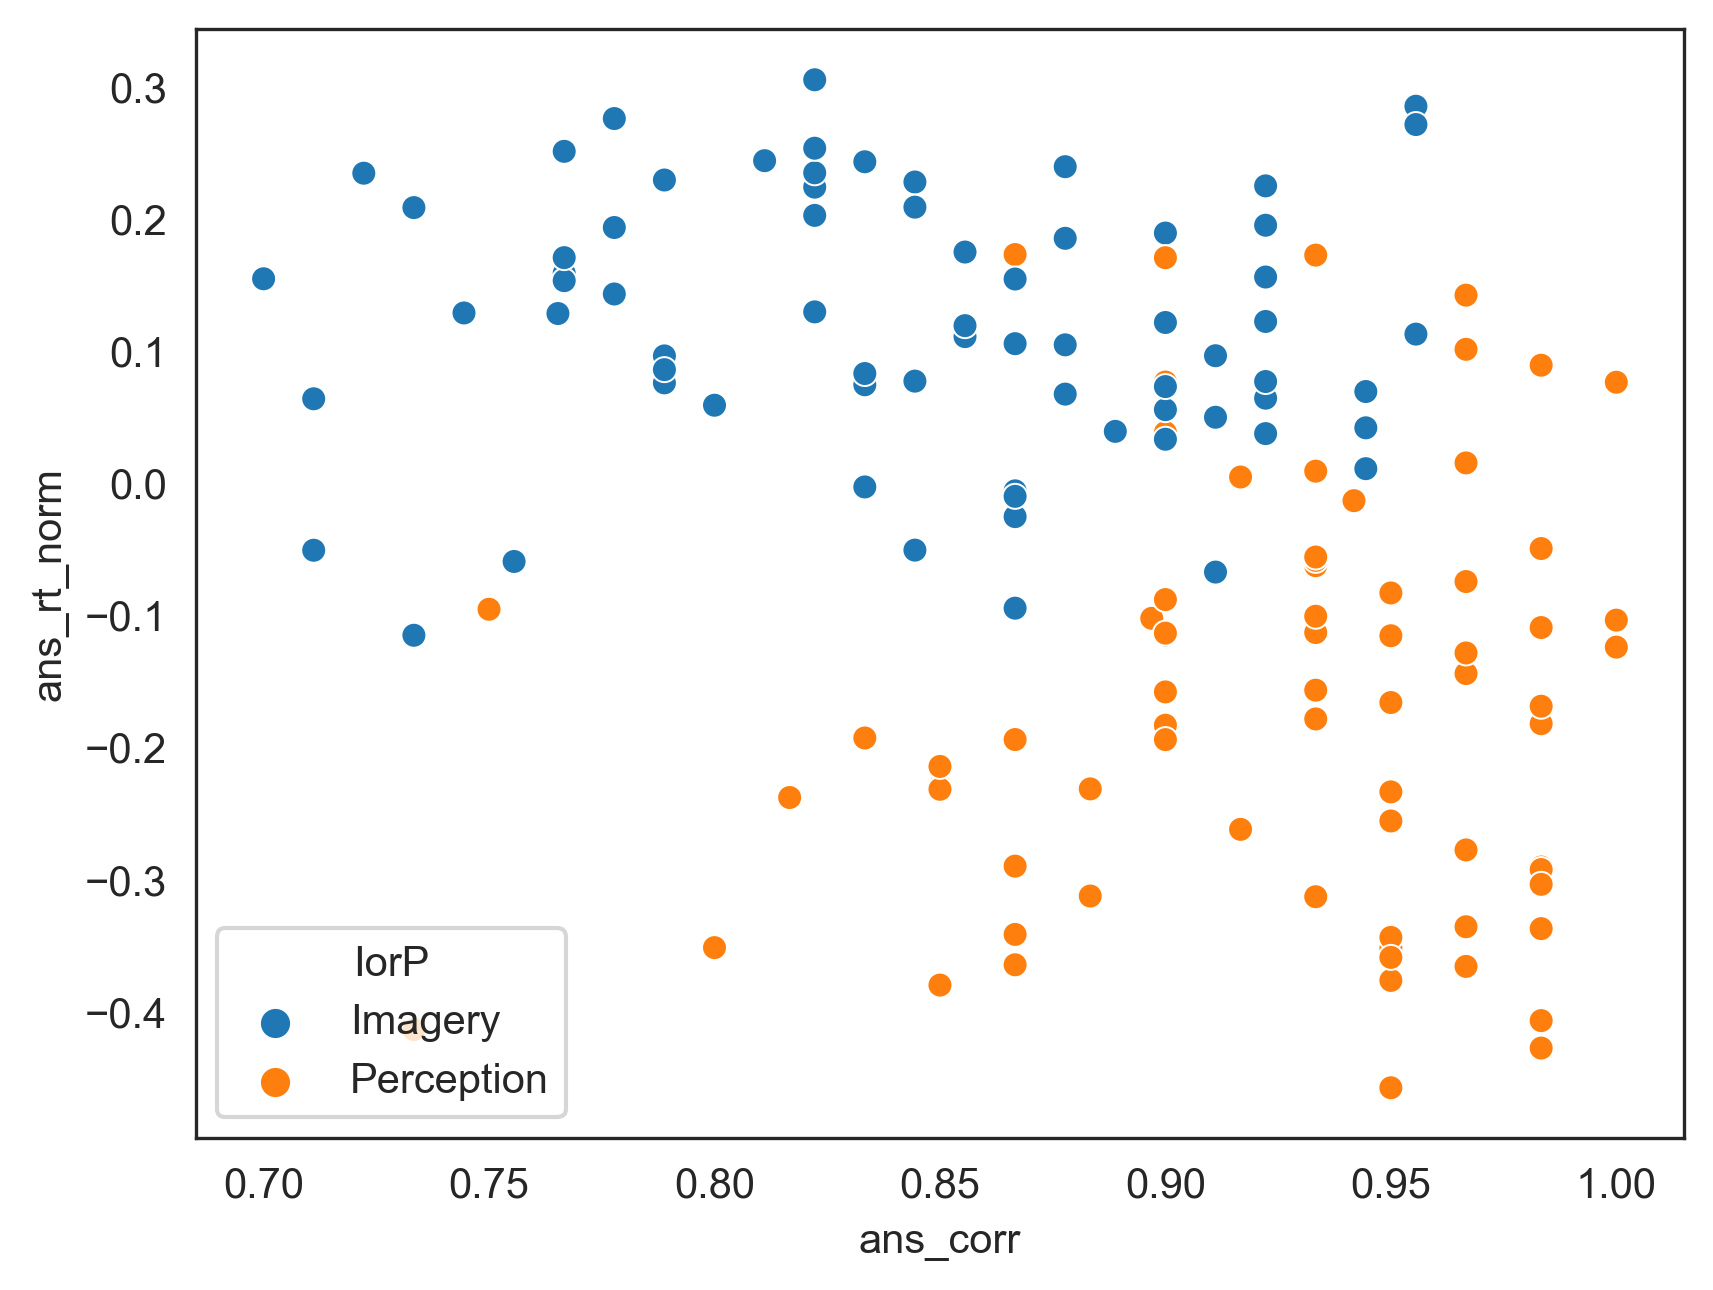

In [16]:
sns.scatterplot(x='ans_corr', y='ans_rt_norm', data=df_overall, hue='IorP')

In [18]:
df_domain = df_agg[['participant', 'IorP', 'field', 'ans_corr', 'ans_rt_norm', 'ans_rt']]
df_domain.head()

,participant,IorP,field,ans_corr,ans_rt_norm,ans_rt
0,L127-H,Imagery,Color,1.000000,-0.089344,1.358138
1,L127-H,Imagery,Face,0.722222,0.866611,1.993851
2,L127-H,Imagery,Letter,1.000000,-0.488657,1.092593
3,L127-H,Imagery,Map,1.000000,-0.015587,1.407186
4,L127-H,Imagery,Shape,1.000000,-0.218949,1.271950


In [19]:
df_lr_viz = pd.concat([df_overall, df_domain]).reset_index(drop=True)
df_lr_viz.head()

,participant,IorP,ans_corr,ans_rt_norm,ans_rt,field
0,L127-H,Imagery,0.944444,0.010815,1.424743,Overall
1,L127-H,Perception,0.941818,-0.013384,1.408651,Overall
2,L128-H,Imagery,0.900000,0.121392,1.362684,Overall
3,L128-H,Perception,0.983333,-0.182088,1.122878,Overall
4,L129-O,Imagery,0.822222,0.223788,1.225182,Overall


Overall
Optimization terminated successfully.
         Current function value: 0.254829
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  150
Model:                          Logit   Df Residuals:                      147
Method:                           MLE   Df Model:                            2
Date:                Fri, 02 Aug 2024   Pseudo R-squ.:                  0.6324
Time:                        16:47:11   Log-Likelihood:                -38.224
converged:                       True   LL-Null:                       -103.97
Covariance Type:            nonrobust   LLR p-value:                 2.793e-29
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          21.7833      5.491      3.967      0.000      11.022      32.545
ans_corr      -24.

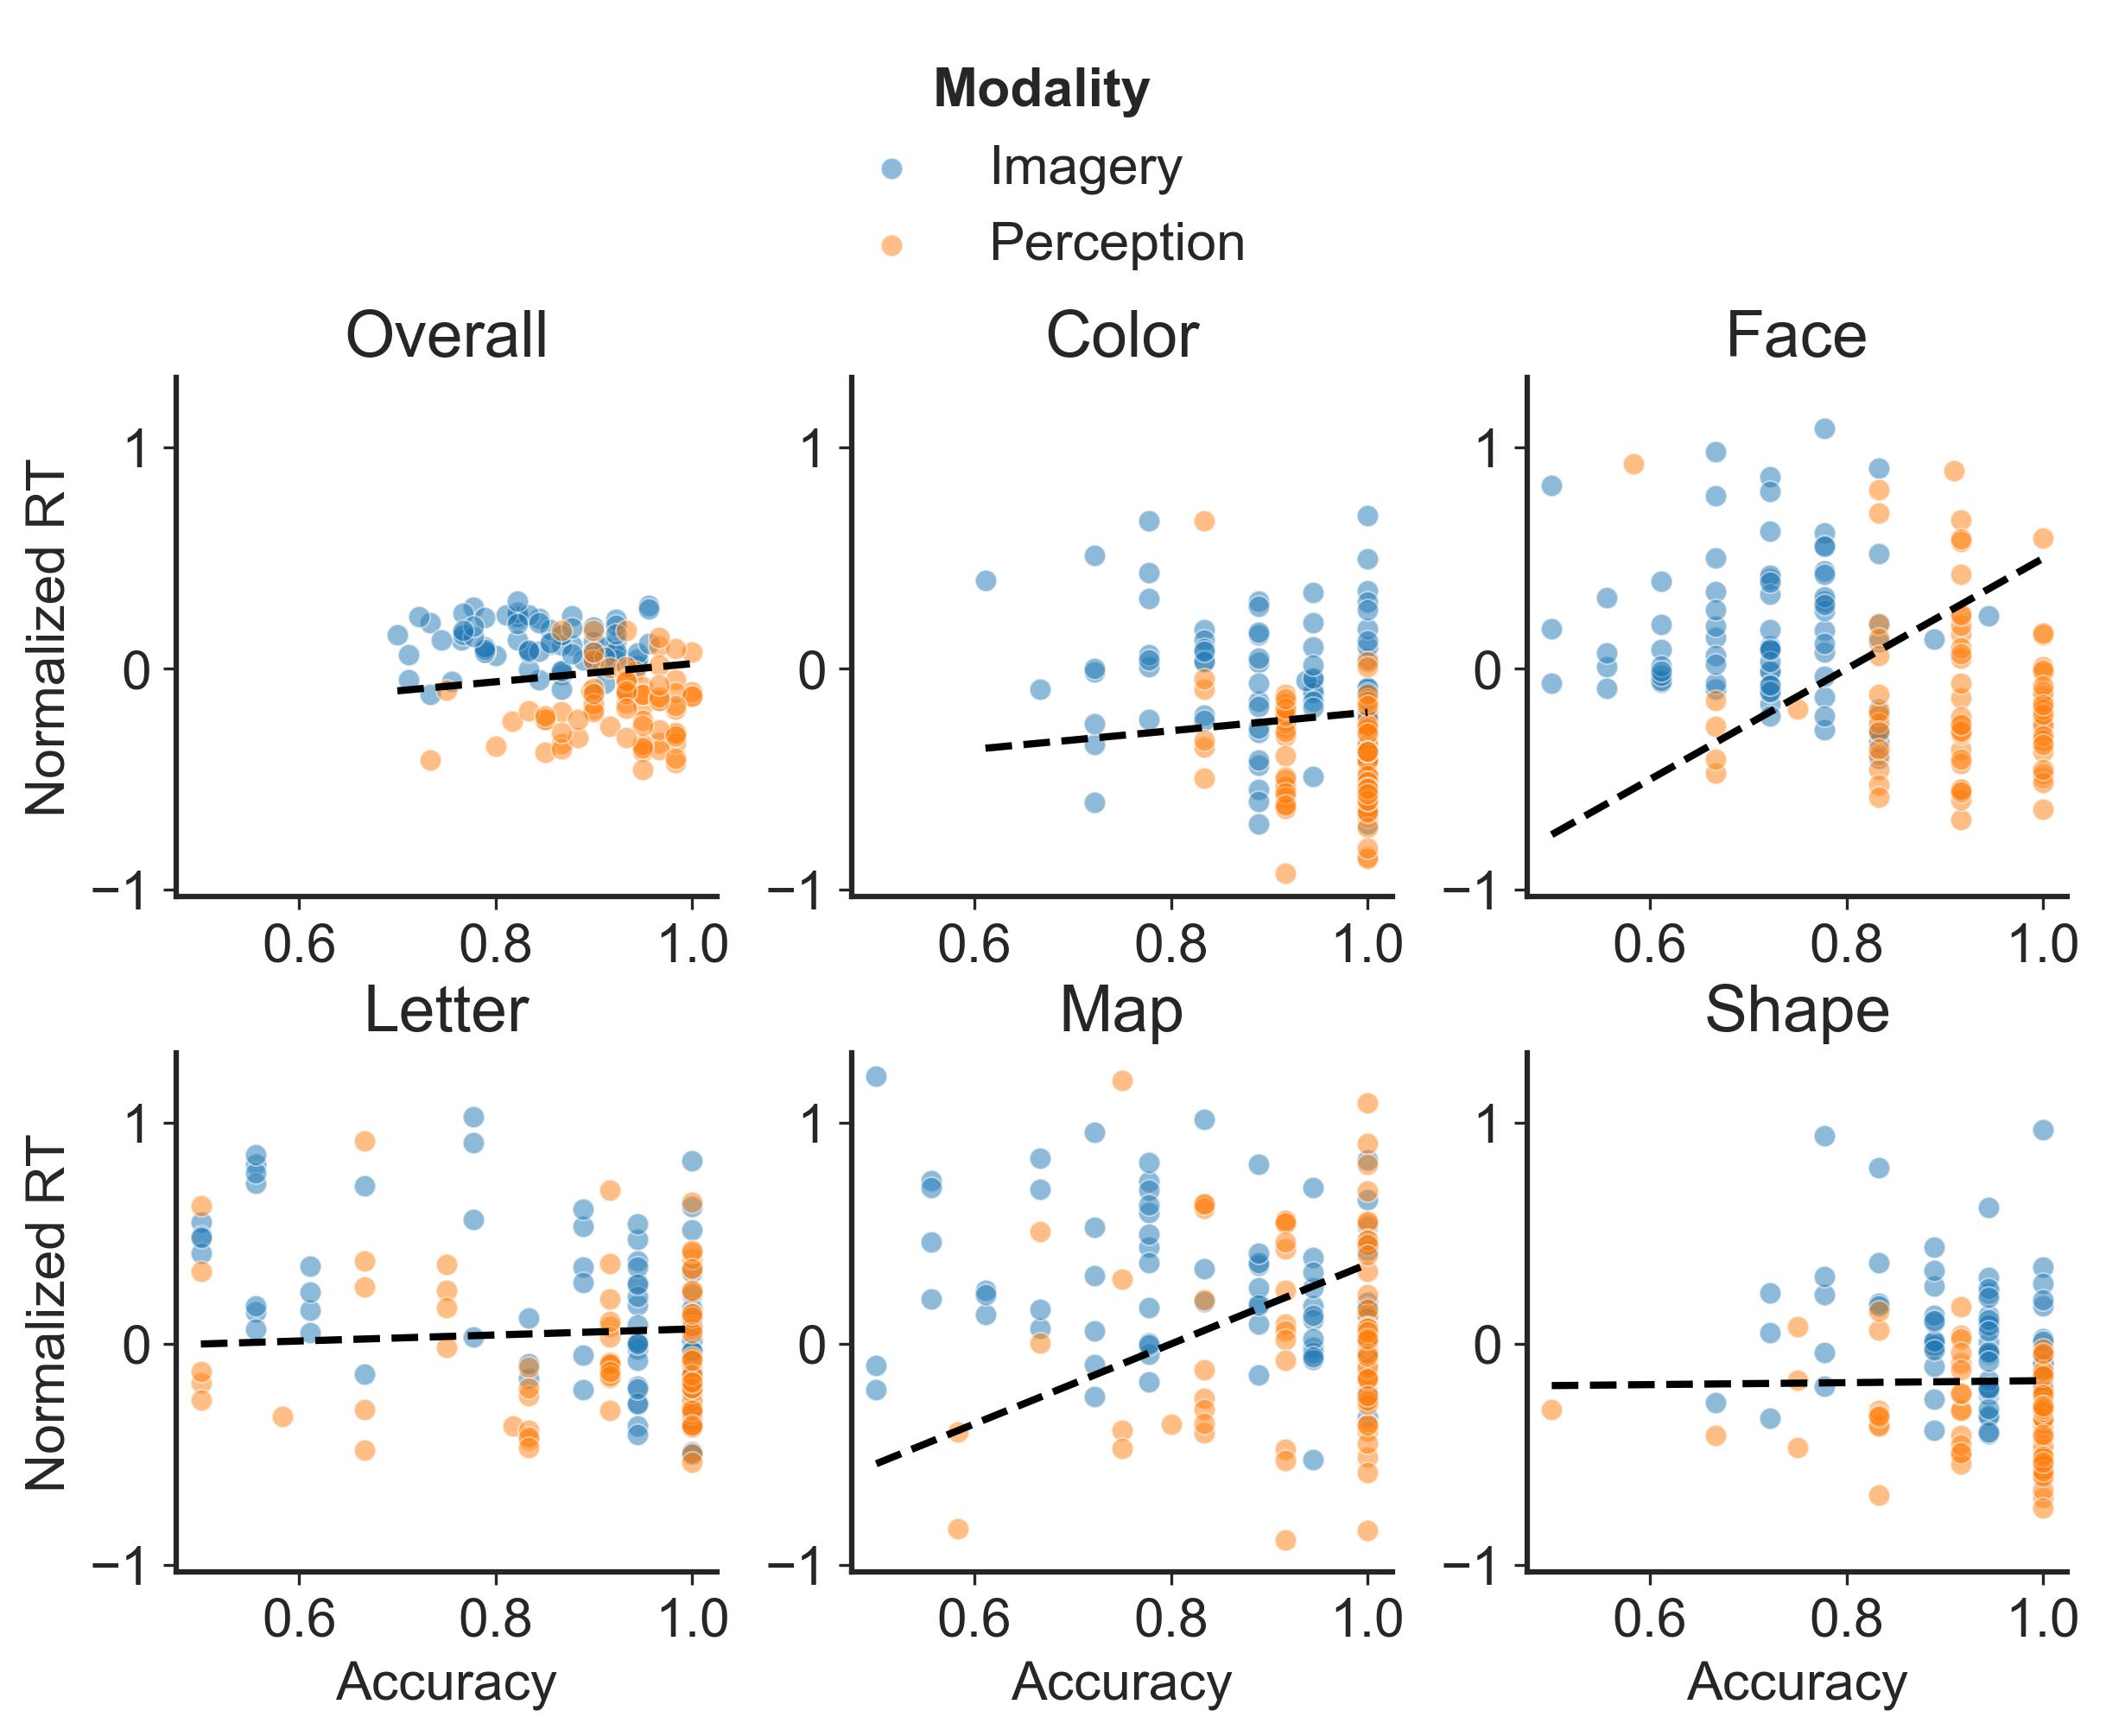

In [21]:
from sklearn.linear_model import LogisticRegression
# facet grid for each domain
g = sns.FacetGrid(df_lr_viz, col='field', hue='IorP', col_wrap=3, height=2.75)
g.map(sns.scatterplot, 'ans_corr', 'ans_rt_norm', alpha=0.5)
g.add_legend(fontsize="15", ncol=1)
# legend title
g._legend.set_title('Modality', prop={'size': 15, 'weight': 'bold'})
# legend font size
g._legend.set_bbox_to_anchor((0.5, 1.1))  # (x, y) coordinates of the legend's anchor


g.set_axis_labels('Accuracy', 'Normalized RT')

res = pd.DataFrame(columns=['domain', 'acc_coef', 'acc_var', 'acc_pvalue', 'rt_coef', 'rt_var', 'rt_pvalue', 'model_p_value', 'model_r2'])
for ax in g.axes.flat:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.title.set_text(ax.title.get_text().split('=')[1].strip())
    ax.title.set_size(18)
    # font size for x and y labels and ticks
    ax.xaxis.label.set_size(15)
    ax.yaxis.label.set_size(15)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(axis='both', which='major', labelsize=15)
    # plot the logistic regression line
    print(ax.title.get_text())
    X = df_lr_viz[df_lr_viz['field'] == ax.title.get_text()][['ans_corr', 'ans_rt_norm']]
    y = df_lr_viz[df_lr_viz['field'] == ax.title.get_text()]['IorP']
    y = np.where(y == 'Imagery', 1, 0)
    logit = LogisticRegression()
    logit.fit(X, y)
    stat_logit = sm.Logit(y, sm.add_constant(X)).fit()
    print(stat_logit.summary())
    acc_coef, rt_coef = stat_logit.params.values[1:].tolist()
    acc_var, rt_var = stat_logit.bse.values[1:].tolist()
    acc_pvalue, rt_pvalue = stat_logit.pvalues.values[1:].tolist()
    model_p_value = stat_logit.llr_pvalue
    model_r2 = stat_logit.prsquared
    res = res.append({'domain': ax.title.get_text(), 'acc_coef': acc_coef, 'acc_var': acc_var, 'acc_pvalue': acc_pvalue, 'rt_coef': rt_coef, 'rt_var': rt_var, 'rt_pvalue': rt_pvalue, 'model_p_value': model_p_value, 'model_r2': model_r2}, ignore_index=True)
    # plot the decision boundary
    x_values = np.array([X['ans_corr'].min(), X['ans_corr'].max()])
    y_values = -(logit.intercept_ + logit.coef_[0][0] * x_values) / logit.coef_[0][1]
    model_p_value = stat_logit.llr_pvalue
    model_r2 = stat_logit.prsquared
    ax.plot(x_values, y_values, color='black', linestyle='--', linewidth=2)
    # draw p-value and R^2
    if model_p_value < 0.001:
        p_value_text = '$p < 0.001$'
    else:
        p_value_text = f'$p = {model_p_value:.3f}$'
    r2_text = f'$R^2 = {model_r2:.3f}$'
    # ax.text(0.05, 0.9, p_value_text, transform=ax.transAxes, fontsize=12)
    # ax.text(0.05, 0.8, r2_text, transform=ax.transAxes, fontsize=12)

plt.subplots_adjust(wspace=0.25, hspace=0.3)

# format values as decimal
res['acc_coef'] = res['acc_coef'].apply(lambda x: f'{x:.3f}')
res['acc_var'] = res['acc_var'].apply(lambda x: f'{x:.3f}')
res['acc_pvalue'] = res['acc_pvalue'].apply(lambda x: f'{x:.3f}')
res['rt_coef'] = res['rt_coef'].apply(lambda x: f'{x:.3f}')
res['rt_var'] = res['rt_var'].apply(lambda x: f'{x:.3f}')
res['rt_pvalue'] = res['rt_pvalue'].apply(lambda x: f'{x:.3f}')
res['model_p_value'] = res['model_p_value'].apply(lambda x: f'{x:.3f}')

In [22]:
res

,domain,acc_coef,acc_var,acc_pvalue,rt_coef,rt_var,rt_pvalue,model_p_value,model_r2
0,Overall,-24.094,6.066,0.000,15.013,2.623,0.000,0.000,0.632359
1,Color,-7.890,2.831,0.005,4.172,0.845,0.000,0.000,0.273339
2,Face,-19.214,3.122,0.000,1.690,0.696,0.015,0.000,0.521295
3,Letter,-0.148,1.126,0.896,1.592,0.542,0.003,0.004,0.052348
4,Map,-5.510,1.479,0.000,1.233,0.466,0.008,0.000,0.131503
5,Shape,0.197,2.353,0.933,6.562,1.107,0.000,0.000,0.312876
